In [1]:
import matplotlib.dates
import pandas as pd
import requests
from tqdm.auto import tqdm

In [ ]:
# Вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти). К сожалению, обойти не удалось(((

In [46]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [47]:
import requests
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [48]:
vacancies

{'items': [{'id': '47466980',
   'premium': False,
   'name': 'Оператор Сбер',
   'department': {'id': '3529-3529-stat', 'name': 'Сбер. Начало карьеры'},
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '66',
    'name': 'Нижний Новгород',
    'url': 'https://api.hh.ru/areas/66'},
   'salary': {'from': 40062, 'to': 63800, 'currency': 'RUR', 'gross': True},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Нижний Новгород',
    'street': 'улица Академика Сахарова',
    'building': '2А',
    'description': None,
    'lat': 56.266627,
    'lng': 44.024743,
    'raw': 'Нижний Новгород, улица Академика Сахарова, 2А',
    'metro': None,
    'metro_stations': [],
    'id': '4511729'},
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2021-10-21T12:18:18+0300',
   'created_at': '2021-10-21T12:18:18+0300',
   'archived': False,
   'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=47466980',
   

In [49]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [50]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [51]:
from tqdm.auto import tqdm
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [52]:
len(all_vacancy_ids)

2000

In [ ]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [53]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()

In [54]:
vacancy.keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'site', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary'])

In [ ]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [55]:
from collections import defaultdict
from tqdm.auto import tqdm
tab_dict = defaultdict(list)
for vid in tqdm(all_vacancy_ids[:20]):
    url = f'https://api.hh.ru/vacancies/{vid}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict['id'].append(vacancy.get('id'))
    tab_dict['name'].append(vacancy.get('name'))
    tab_dict['published_at'].append(vacancy.get('published_at'))
    tab_dict['description'].append(vacancy.get('description'))
    skills = ','.join([x.get('name') for x in vacancy.get('key_skills')])
    tab_dict['key_skills'].append(skills)

  0%|          | 0/20 [00:00<?, ?it/s]

In [77]:
import pandas as pd
df = pd.DataFrame(tab_dict)

In [78]:
df

,id,name,published_at,description,key_skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода..."
1,44366886,Клиентский менеджер,2021-10-11T13:17:56+0300,"<p> </p> <p>Клиентский менеджер ― специалист, ...",
2,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,
3,46755014,Клиентский менеджер,2021-10-02T17:17:08+0300,<p><strong>Клиентский менеджер</strong></p> <p...,"Активные продажи,Холодные продажи,Прямые продажи"
4,48701807,Оператор СБЕР,2021-10-11T11:35:20+0300,<p>Сбер – это не только компания с многолетней...,"Грамотная речь,входящие звонки,Обучение и разв..."
5,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени..."
6,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
7,45499102,Менеджер по работе с ключевыми клиентами малог...,2021-10-14T16:18:23+0300,<p><strong>Хочешь строить карьеру в лучшем бан...,
8,46580388,Клиентский менеджер (Прямые продажи),2021-10-18T05:52:39+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Публичные выступления,Прямые продажи,Холодные ..."
9,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",


In [ ]:
# Переведите даты публикаций в datetime

In [79]:
pd.to_datetime(df.published_at)

0    2021-10-14 14:48:43+03:00
1    2021-10-11 13:17:56+03:00
2    2021-10-11 11:10:21+03:00
3    2021-10-02 17:17:08+03:00
4    2021-10-11 11:35:20+03:00
5    2021-10-19 15:28:19+03:00
6    2021-09-30 19:22:35+03:00
7    2021-10-14 16:18:23+03:00
8    2021-10-18 05:52:39+03:00
9    2021-10-21 10:21:45+03:00
10   2021-10-06 20:09:35+03:00
11   2021-10-20 13:26:02+03:00
12   2021-10-15 17:04:38+03:00
13   2021-10-20 15:26:31+03:00
14   2021-10-21 09:27:54+03:00
15   2021-10-29 19:39:59+03:00
16   2021-10-11 11:33:08+03:00
17   2021-10-01 18:17:08+03:00
18   2021-10-25 17:19:22+03:00
19   2021-10-01 17:22:15+03:00
Name: published_at, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [ ]:
# График по датам публикации
# Посчитать по датам количество вакансий

In [80]:
df.groupby('published_at')['id'].count().sum()

20

In [81]:
t1 = df.published_at.notna()
t2 = df.name.str.lower()
t3 = df.name.str.lower()

df[
    t1 &
    t2 &
    t3
    ]

,id,name,published_at,description,key_skills
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14T14:48:43+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода..."
1,44366886,Клиентский менеджер,2021-10-11T13:17:56+0300,"<p> </p> <p>Клиентский менеджер ― специалист, ...",
2,46943947,Клиентский менеджер прямых продаж,2021-10-11T11:10:21+0300,<p>У каждого нашего зарплатного клиента – комп...,
3,46755014,Клиентский менеджер,2021-10-02T17:17:08+0300,<p><strong>Клиентский менеджер</strong></p> <p...,"Активные продажи,Холодные продажи,Прямые продажи"
4,48701807,Оператор СБЕР,2021-10-11T11:35:20+0300,<p>Сбер – это не только компания с многолетней...,"Грамотная речь,входящие звонки,Обучение и разв..."
5,48160324,Менеджер службы заботы,2021-10-19T15:28:19+0300,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени..."
6,48419849,Администратор зала,2021-09-30T19:22:35+0300,<p><strong>Обязанности:</strong></p> <ul> <li>...,
7,45499102,Менеджер по работе с ключевыми клиентами малог...,2021-10-14T16:18:23+0300,<p><strong>Хочешь строить карьеру в лучшем бан...,
8,46580388,Клиентский менеджер (Прямые продажи),2021-10-18T05:52:39+0300,"<p>Хочешь работать в банке, но офисная рутина ...","Публичные выступления,Прямые продажи,Холодные ..."
9,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21T10:21:45+0300,"<p>Мы ищем коллегу, который будет помогать наш...",


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20 non-null     object
 1   name          20 non-null     object
 2   published_at  20 non-null     object
 3   description   20 non-null     object
 4   key_skills    20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


In [83]:
# перевести даты в формат datetime
df.published_at = pd.to_datetime(df.published_at)

In [84]:
df.published_at.dtype

datetime64[ns, pytz.FixedOffset(180)]

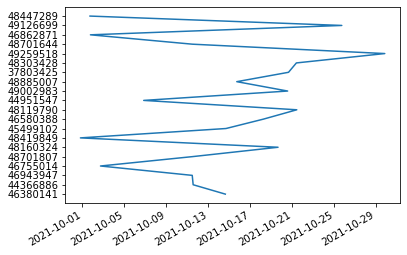

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(df['published_at'], df['id'])
fig.autofmt_xdate()
plt.show()

In [148]:
import pandas as pd
df = pd.DataFrame(tab_dict)

In [149]:
df.published_at = pd.to_datetime(df.published_at)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   id            20 non-null     object                               
 1   name          20 non-null     object                               
 2   published_at  20 non-null     datetime64[ns, pytz.FixedOffset(180)]
 3   description   20 non-null     object                               
 4   key_skills    20 non-null     object                               
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(4)
memory usage: 928.0+ bytes


In [ ]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [151]:
df['weekday_num'] = df.published_at.apply(lambda x:x.strftime('%A'))

In [152]:
df

,id,name,published_at,description,key_skills,weekday_num
0,46380141,Клиентский менеджер внешней дистрибуции (Прямы...,2021-10-14 14:48:43+03:00,"<p>Хочешь работать в банке, но офисная рутина ...","Активные продажи,Работа в команде,Навыки прода...",Thursday
1,44366886,Клиентский менеджер,2021-10-11 13:17:56+03:00,"<p> </p> <p>Клиентский менеджер ― специалист, ...",,Monday
2,46943947,Клиентский менеджер прямых продаж,2021-10-11 11:10:21+03:00,<p>У каждого нашего зарплатного клиента – комп...,,Monday
3,46755014,Клиентский менеджер,2021-10-02 17:17:08+03:00,<p><strong>Клиентский менеджер</strong></p> <p...,"Активные продажи,Холодные продажи,Прямые продажи",Saturday
4,48160324,Менеджер службы заботы,2021-10-19 15:28:19+03:00,<p>Cлужба заботы F1 отвечает за оперативную по...,"Грамотная речь,Работа в команде,Деловое общени...",Tuesday
5,48701807,Оператор СБЕР,2021-10-11 11:35:20+03:00,<p>Сбер – это не только компания с многолетней...,"Грамотная речь,входящие звонки,Обучение и разв...",Monday
6,48419849,Администратор зала,2021-09-30 19:22:35+03:00,<p><strong>Обязанности:</strong></p> <ul> <li>...,,Thursday
7,45499102,Менеджер по работе с ключевыми клиентами малог...,2021-10-14 16:18:23+03:00,<p><strong>Хочешь строить карьеру в лучшем бан...,,Thursday
8,44951547,Клиентский менеджер,2021-10-06 20:09:35+03:00,"<p>Клиентский менеджер ― специалист, который п...","Активные продажи,Прямые продажи",Wednesday
9,48119790,Менеджер по подбору новостроек от Домклик,2021-10-21 10:21:45+03:00,"<p>Мы ищем коллегу, который будет помогать наш...",,Thursday


In [153]:
df.groupby('weekday_num').count()

,id,name,published_at,description,key_skills
weekday_num,,,,,
Friday,1,1,1,1,1
Monday,7,7,7,7,7
Saturday,2,2,2,2,2
Thursday,5,5,5,5,5
Tuesday,2,2,2,2,2
Wednesday,3,3,3,3,3


In [ ]:
# Найдите те вакансии с использованием python, которые вам интересны

In [159]:
top = df['name'].value_counts('менеджер')
top

Клиентский менеджер                                         0.15
Клиентский менеджер (Прямые продажи)                        0.10
Менеджер по подбору новостроек от Домклик                   0.05
Менеджер службы заботы                                      0.05
Клиентский менеджер внешней дистрибуции (Прямые продажи)    0.05
Специалист СБЕР                                             0.05
Оператор СБЕР                                               0.05
Старший кассир                                              0.05
Финансовый консультант (Доставка банковских продуктов)      0.05
Аналитик в Штабе Председателя Северо-Западного Банка        0.05
Администратор зала                                          0.05
Менеджер по обслуживанию                                    0.05
Клиентский менеджер прямых продаж                           0.05
Стажер (Python)                                             0.05
Руководитель проектов (Департамент строительства)           0.05
Клиентский менеджер Сберб

In [ ]:
# Вариант 1 - Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [165]:
y = pd.Series(''.join(df['key_skills']).lower().split()).value_counts()[:20]

In [163]:
y

в                                                0.069767
и                                                0.069767
привлечение                                      0.046512
продажи,прямые                                   0.046512
продажи,холодные                                 0.046512
клиентов                                         0.046512
речь,работа                                      0.023256
по                                               0.023256
звонки,обучение                                  0.023256
команде,деловое                                  0.023256
отчетность,проведение                            0.023256
команде,работа                                   0.023256
jira,atlassian                                   0.023256
клиентовактивные                                 0.023256
презентаций,sql,финансовая                       0.023256
клиентами,консультирование                       0.023256
переговоры,консультирование                      0.023256
активные      

In [ ]:
# Вариант 2 - Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [161]:
df['key_skills'].value_counts()[:10]

                                                                                                                  11
Работа в команде,Работа с клиентами,Консультирование клиентов                                                      1
Грамотная речь,Работа в команде,Деловое общение,Atlassian Jira,Atlassian Confluence                                1
Активные продажи,Работа в команде,Навыки продаж,Поиск и привлечение клиентов                                       1
Грамотная речь,входящие звонки,Обучение и развитие,Телефонные переговоры,Консультирование клиентов по телефону     1
MS PowerPoint,Подготовка презентаций,SQL,Финансовая отчетность,Проведение презентаций                              1
Python,JavaScript,Git,SQL,Linux                                                                                    1
Активные продажи,Прямые продажи                                                                                    1
Активные продажи,Холодные продажи,Прямые продажи                

In [ ]:
# NEW Вариант 3 - Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [88]:
# Объединение навыков в один большой список через запятую
st = ','.join(df["key_skills"])
st

'Активные продажи,Работа в команде,Навыки продаж,Поиск и привлечение клиентов,,,Активные продажи,Холодные продажи,Прямые продажи,Грамотная речь,входящие звонки,Обучение и развитие,Телефонные переговоры,Консультирование клиентов по телефону,Грамотная речь,Работа в команде,Деловое общение,Atlassian Jira,Atlassian Confluence,,,Публичные выступления,Прямые продажи,Холодные звонки,Активные продажи,Поиск и привлечение клиентов,,Активные продажи,Прямые продажи,,MS PowerPoint,Подготовка презентаций,SQL,Финансовая отчетность,Проведение презентаций,,,Python,SQL,MS PowerPoint,Data Analysis,,,Работа в команде,Работа с клиентами,Консультирование клиентов,'

In [94]:
# Определение частоты встречаемости каждого из навыков
y = pd.Series(''.join(df['key_skills']).lower().split()).value_counts()[:20]
y

и                              3
в                              3
продажи,прямые                 2
клиентовактивные               2
клиентов                       2
привлечение                    2
продажи,холодные               2
переговоры,консультирование    1
речь,входящие                  1
powerpoint,подготовка          1
презентаций,sql,финансовая     1
команде,навыки                 1
продажи,поиск                  1
продаж,поиск                   1
клиентами,консультирование     1
jira,atlassian                 1
речь,работа                    1
отчетность,проведение          1
analysisработа                 1
телефонуграмотная              1
dtype: int64

In [183]:
vacs = df.groupby('key_skills')['id'].count().reset_index()
vacs

,key_skills,id
0,,11
1,"MS PowerPoint,Подготовка презентаций,SQL,Финан...",1
2,"Python,JavaScript,Git,SQL,Linux",1
3,"Активные продажи,Прямые продажи",1
4,"Активные продажи,Работа в команде,Навыки прода...",1
5,"Активные продажи,Холодные продажи,Прямые продажи",1
6,"Грамотная речь,Работа в команде,Деловое общени...",1
7,"Грамотная речь,входящие звонки,Обучение и разв...",1
8,"Публичные выступления,Прямые продажи,Холодные ...",1
9,"Работа в команде,Работа с клиентами,Консультир...",1


In [184]:
df.groupby('key_skills')['id'].count().sort_values(ascending=False)

key_skills
                                                                                                                  11
MS PowerPoint,Подготовка презентаций,SQL,Финансовая отчетность,Проведение презентаций                              1
Python,JavaScript,Git,SQL,Linux                                                                                    1
Активные продажи,Прямые продажи                                                                                    1
Активные продажи,Работа в команде,Навыки продаж,Поиск и привлечение клиентов                                       1
Активные продажи,Холодные продажи,Прямые продажи                                                                   1
Грамотная речь,Работа в команде,Деловое общение,Atlassian Jira,Atlassian Confluence                                1
Грамотная речь,входящие звонки,Обучение и развитие,Телефонные переговоры,Консультирование клиентов по телефону     1
Публичные выступления,Прямые продажи,Холодные звонки,

In [187]:
vacs = vacs.sort_values(by='id',ascending=False)

In [188]:
vacs.nlargest(5, 'id')

,key_skills,id
0,,11
1,"MS PowerPoint,Подготовка презентаций,SQL,Финан...",1
2,"Python,JavaScript,Git,SQL,Linux",1
3,"Активные продажи,Прямые продажи",1
4,"Активные продажи,Работа в команде,Навыки прода...",1


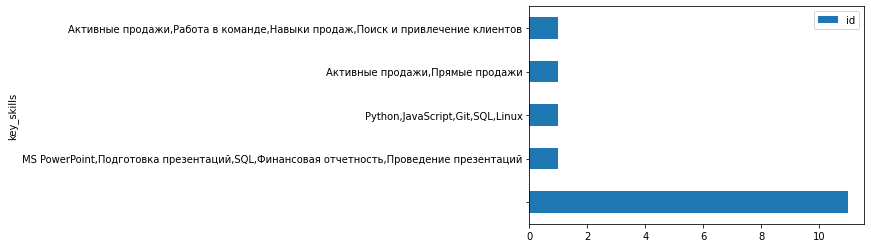

In [189]:
vacs.nlargest(5, 'id').set_index('key_skills').plot(kind='barh');

In [ ]:
# На этом все:)

In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий